In [40]:
# PCA(Principal Component Analysis) : 주성분 분석
# https://datascienceschool.net/02%20mathematics/03.05%20PCA.html

In [10]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [13]:
principalDf.head()

,principal component1,principal component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [14]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [15]:
sum(pca.explained_variance_ratio_)

0.9580097536148199

In [16]:
pca = PCA(n_components=3)

printcipalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', '3'])

pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

In [31]:
# PCA(Principal Component Analysis) : 주성분 분석 part2

In [32]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
# iris


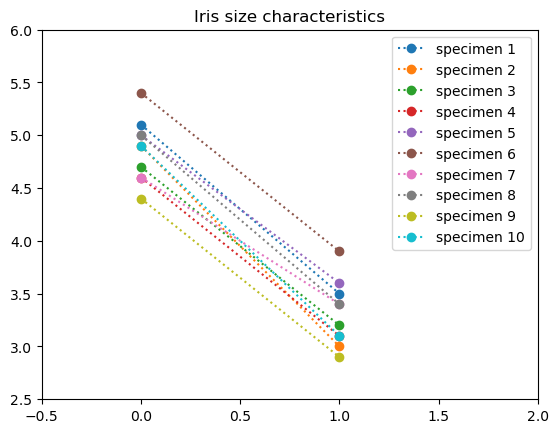

In [34]:
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.plot(X.T, 'o:')
# plt.xticks(range(4), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("Iris size characteristics")
plt.legend(["specimen {}".format(i + 1) for i in range(N)])
plt.show()

In [5]:
# 꽃받침 길이가 크면 꽃받침 폭도 같이 커진다는 규칙

In [39]:
data=pd.DataFrame(X)
import seaborn as sns
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data, s=100, color=".2", marker="s")

for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Iris size characteristics (demension 2)")
plt.axis("equal")
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 3 were given

<Figure size 800x800 with 0 Axes>

In [1]:

import seaborn as sns
from sklearn.decomposition import PCA
iris = sns.load_dataset("iris")
iris_X, iris_y = iris.iloc[:,:-1], iris.species

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_X)

In [2]:
iris_pca[:5,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [3]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [4]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [ ]:
# from sklearn.decomposition import PCA

# pca1 = PCA(n_components=1)
# X_low = pca1.fit_transform(X)
# X2 = pca1.inverse_transform(X_low)



In [24]:
# from sklearn.decomposition import PCA

# pca1 = PCA(n_components=1)
# X_low = pca1.fit_transform(X)
# X2 = pca1.inverse_transform(X_low)

# plt.figure(figsize=(7, 7))
# ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
# for i in range(N):
#     d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
#     ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
#     plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
# plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
# plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
# plt.axvline(X[:, 0].mean(), c='r')
# plt.axhline(X[:, 1].mean(), c='r')
# plt.grid(False)
# plt.xlabel("꽃받침 길이")
# plt.ylabel("꽃받침 폭")
# plt.title("Iris 데이터의 1차원 차원축소")
# plt.axis("equal")
# plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/jovyan/scikit_learn_data


/tmp/ipykernel_1014783/3841962770.py:20: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3841962770.py:20: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3841962770.py:20: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3841962770.py:20: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3841962770.py:20: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3841962770.py:20: UserWarning: Glyph 44404 (\N{HANGUL SYLLABLE GUL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3841962770.py:20: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/38

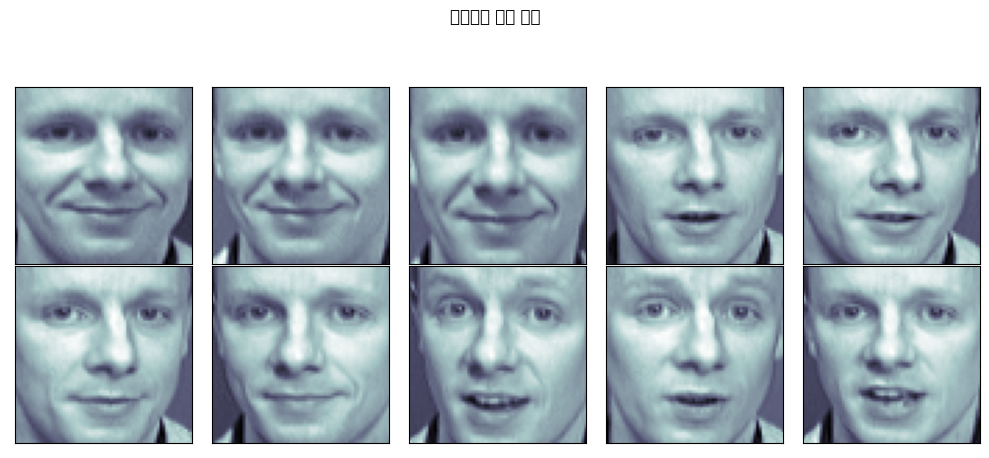

In [25]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

In [26]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

/tmp/ipykernel_1014783/950394077.py:14: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/950394077.py:14: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/950394077.py:14: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/950394077.py:14: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/950394077.py:14: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/950394077.py:14: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/950394077.py:14: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/950

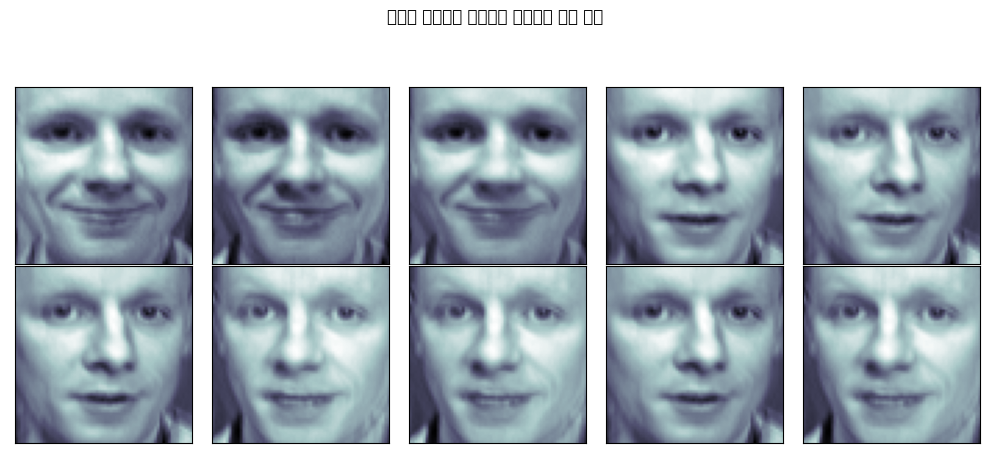

In [27]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


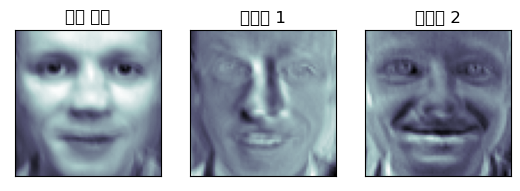

In [28]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

/tmp/ipykernel_1014783/507133474.py:16: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/507133474.py:16: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/507133474.py:16: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/507133474.py:16: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/507133474.py:16: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/507133474.py:16: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/507133474.py:16: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/5

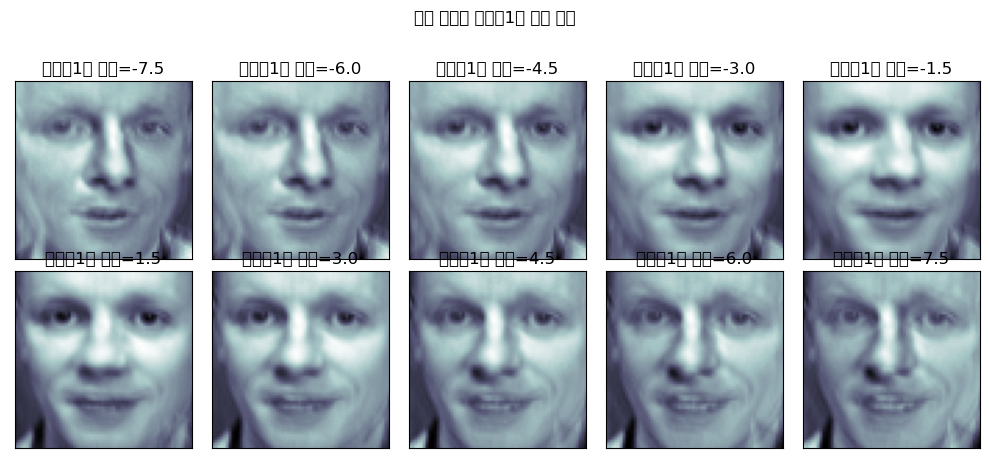

In [29]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()

/tmp/ipykernel_1014783/3646670355.py:16: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3646670355.py:16: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3646670355.py:16: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3646670355.py:16: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3646670355.py:16: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3646670355.py:16: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1014783/3646670355.py:16: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_10

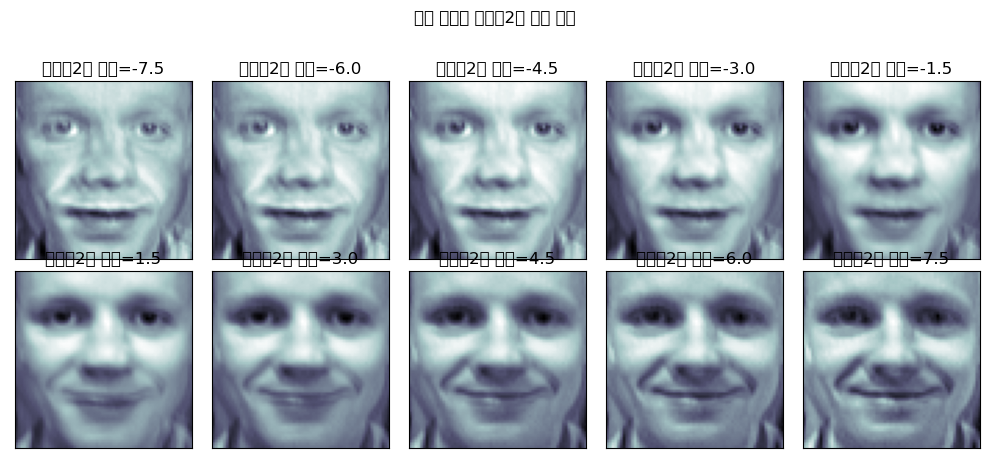

In [30]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중={:.1f}".format(w))
plt.suptitle("평균 얼굴에 주성분2를 더한 사진")
plt.tight_layout()
plt.show()